In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as features

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

# import warnings
# warnings.filterwarnings('ignore')

/home/dadjei2/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
# load and read dataset
data = xr.open_dataset('Africa_cru_data.nc')
data

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
# group data into monthly mean
ds_month_mean = data.groupby('time.month').mean()
ds_month_mean

<xarray.Dataset> Size: 3MB
Dimensions:  (month: 12, lat: 146, lon: 150)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pre      (month, lat, lon) float32 1MB nan nan nan nan ... nan 21.15 20.3
    stn      (month, lat, lon) float64 2MB nan nan nan nan ... nan 6.933 6.883
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
# rename the months to have monthly names instead of values
ds_month_mean['month']=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
ds_month_mean

<xarray.Dataset> Size: 3MB
Dimensions:  (month: 12, lat: 146, lon: 150)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * month    (month) <U3 144B 'Jan' 'Feb' 'Mar' 'Apr' ... 'Oct' 'Nov' 'Dec'
Data variables:
    pre      (month, lat, lon) float32 1MB nan nan nan nan ... nan 21.15 20.3
    stn      (month, lat, lon) float64 2MB nan nan nan nan ... nan 6.933 6.883
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

Text(0.5, 0.98, 'Mean Monthly Precipitation from 1901 - 2020 ')

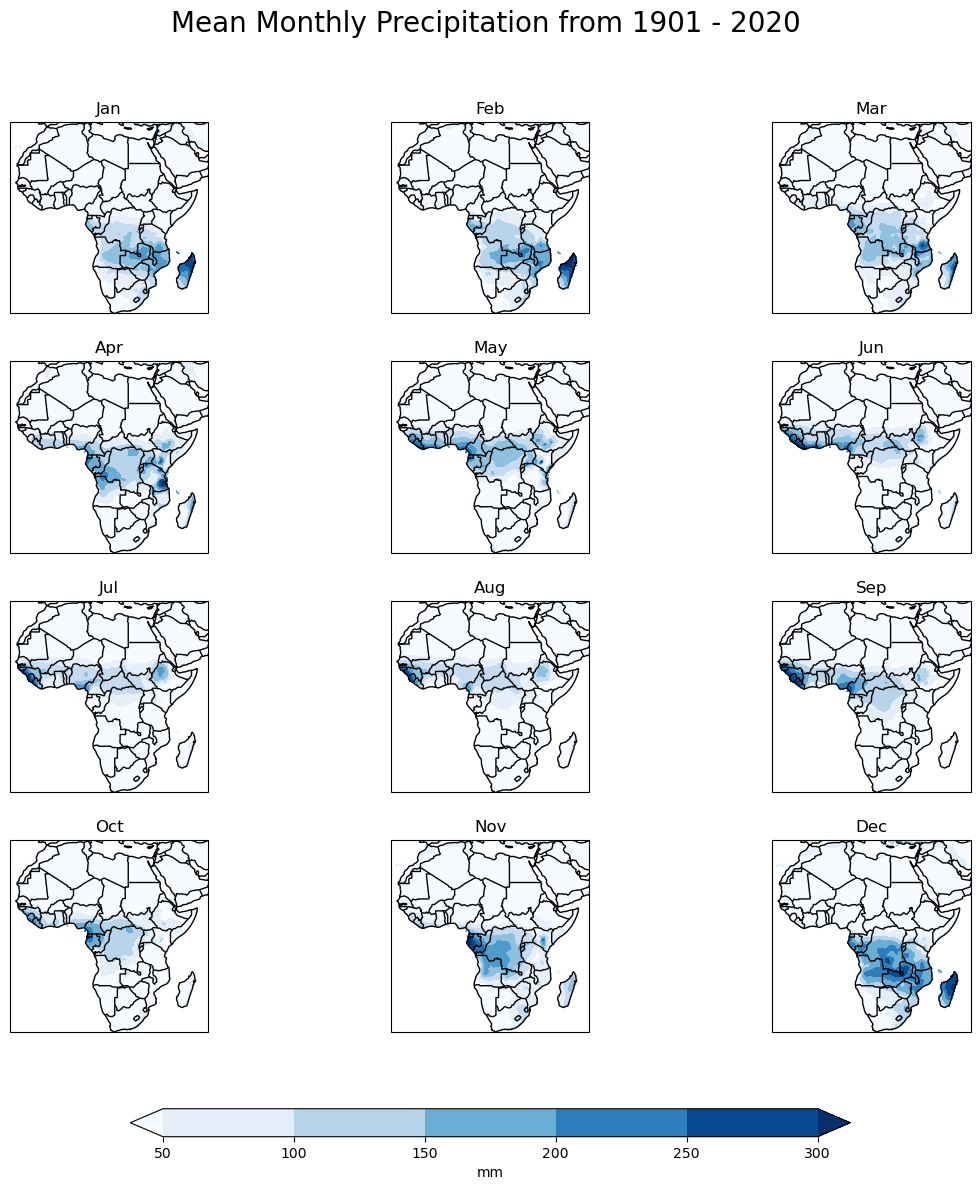

In [14]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12,14))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the months and plot
for i,mon in enumerate(ds_month_mean['month']):

        # Select the month
        data=ds_month_mean['pre'].sel(month=mon)

#         # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_month_mean['lon'])

#         # Contour plot
        cs=axs[i].contourf(lons,ds_month_mean['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='Blues',extend='both')#, vmin=20, vmax=100)

         # assign each subplot title with respective month
        axs[i].set_title(mon.values)

         # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].add_feature(features.BORDERS)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)
    

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm')

# Adding a title 
plt.suptitle('Mean Monthly Precipitation from 1901 - 2020 ',fontsize=20)

